In [1]:
## Imports

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, LogLocator
from matplotlib import cm
import h5py
import os
from mpl_toolkits.mplot3d import axes3d
from cycler import cycler
from scipy.interpolate import griddata
import matplotlib.patches as patches
from math import pi, sqrt
from scipy.optimize import curve_fit
import scipy
from matplotlib.colors import LinearSegmentedColormap
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
## Plot constraints

def PlotConstraintViolation(p, levs, labels, figname, norm=True):
    
    def GetFilename(lev):
        return p + '/JoinedLev' + lev + '/hConstraints.dat'
    
    fig, ax = plt.subplots(4, sharex=True, figsize=(8,12))
    ## Overall denominator
    Normtime, NormD = np.loadtxt(GetFilename(levs[-1]), comments="#",usecols=([0,5]),unpack=True)
    
    cmap = matplotlib.cm.get_cmap('viridis')
    Colors = [cmap(float(i)/(len(levs))) for i in range(len(levs))]
    Colors = Colors[::-1]
    Linestyles = ['-.', '--', '-']
    
    lw = 3
    ms = 3
    
    for lev, lab, c, ls in zip(levs, labels, Colors, Linestyles):
        time, con1, con3, con2, con4, D = np.loadtxt(GetFilename(lev), \
                                                          comments="#",usecols=([0,1,2,3,4,5]),unpack=True)

        print np.average(D)
        if norm:
            con1 = np.divide(con1, D)
            con2 = np.divide(con2, D)
            con3 = np.divide(con3, D)
            con4 = np.divide(con4, D)
        
        ax[0].plot(time, np.abs(con1), '-', label = lab, c=c, lw=lw, ls=ls)
        ax[1].plot(time, np.abs(con2), '-', label = lab, c=c, lw=lw, ls=ls)
        ax[2].plot(time, np.abs(con3), '-', label = lab, c=c, lw=lw, ls=ls)
        ax[3].plot(time, np.abs(con4), '-', label = lab, c=c, lw=lw, ls=ls)
        
    ax[0].set_ylabel('$\|\Delta C_\mathrm{1}\|/\|N_1\|$')
    ax[1].set_ylabel('$\|\Delta C_\mathrm{2}\|/\|N_2\|$')
    ax[2].set_ylabel('$\|\Delta C_\mathrm{3}\|/\|N_3\|$')
    ax[3].set_ylabel('$\|\Delta C_\mathrm{4}\|/\|N_4\|$')
                                
    for a in ax:
        a.set_yscale('log')
    for a in ax[0:-1]:
        a.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
        
    ax[-1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)
        
    leg = ax[0].legend(fontsize=20,framealpha=1.0, loc='lower left')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)
    #ax[-1].set_xlim(0, 0.5)
    ax[-1].set_xlabel('$t/M$')
    plt.subplots_adjust(hspace=0.0)
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

46.2871892297
44.7444345046
44.8996896602


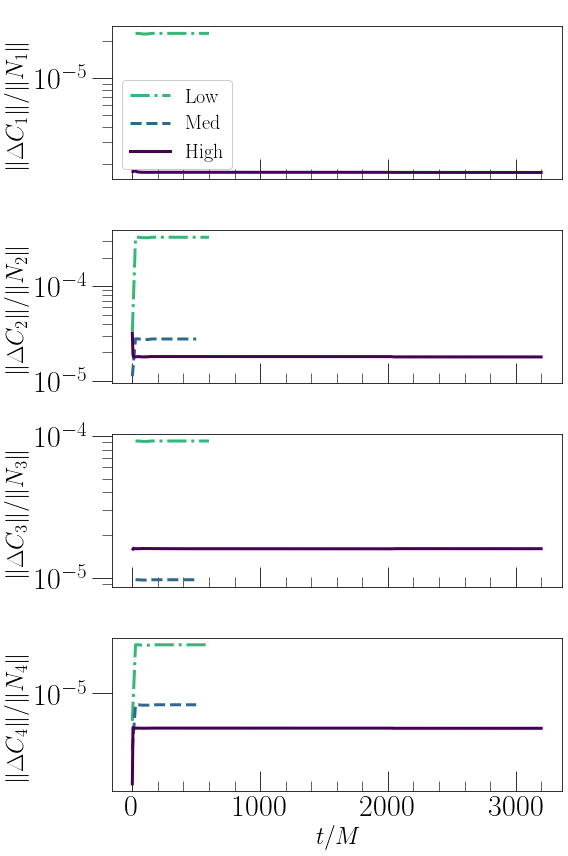

In [4]:
#PlotConstraintViolation('TransformedMultipoleEvolutionTrans', ['0','1','2'], \
#                        ['Low', 'Med','High'], 'MultipolarConstraints.pdf', norm=False)
#PlotConstraintViolation('dCSEvolutionDiabolicalSupport', ['0','1'], ['Low','Med','High'], 'DiabolicalConstraints.pdf')
#PlotConstraintViolation('dCSEvolutionLong/Spin0.1', ['0','1','2'], ['Low', 'Med','High'], 'Test.pdf')
PlotConstraintViolation('dCSEvolutionLong/HiResIDSpin0.1', ['0','1','2'], ['Low', 'Med','High'], 'Test.pdf')
#PlotConstraintViolation('dCSEvolutionLong/Spin0.6', ['0','1','2'], ['Low', 'Med','High'], 'Spin0p6EvConstraints.pdf')
#PlotConstraintViolation('dCSEvolutionLong/Spin0.9', ['0','1','2'], ['Low','Med','High'], 'Spin0p9EvConstraints.pdf')


In [47]:
## Plot field variables

def PlotVariables(p, levs, labels, figname):
    
    def GetFilename(lev):
        return p + '/JoinedLev' + lev + '/Vars.dat'
    
    fig, ax = plt.subplots(1, figsize=(8,4))
    
    cmap = matplotlib.cm.get_cmap('magma')
    Colors = [cmap(float(i)/(len(levs))) for i in range(len(levs))]
    Colors = Colors[::-1]
    #Colors = ['red', 'blue', 'black']
    
    Linestyles = ['-.', '--', '-']
    
    for lev, lab, c, ls in zip(levs, labels, Colors, Linestyles):
        time, psi = np.loadtxt(GetFilename(lev), \
                                                          comments="#",usecols=([0,1]),unpack=True)
        
        time = time[1:]
        psi = psi[1:]
        ax.plot(time, np.abs(psi), '-', label = lab, c=c, ls=ls)

        
    ax.set_ylabel(r'$\|\Delta g_{ab} \| $')
    leg = ax.legend(fontsize=16,framealpha=1.0, loc='lower center')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    ax.set_xlabel('$t/M$')
    #ax.set_xlim(0, 1000)
    
    plt.yscale('log')
    #ax.set_ylim(0.84, 0.88)
    #ax.set_ylim(1.6, 1.65)
    #ax.set_yticks([0.85, 0.87])
    #ax.set_yticks([1.6, 1.65])
    #ax.set_yticklabels(['1.6', '1.65'])
    #ax.set_yticklabels(['0.85', '0.87'])
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

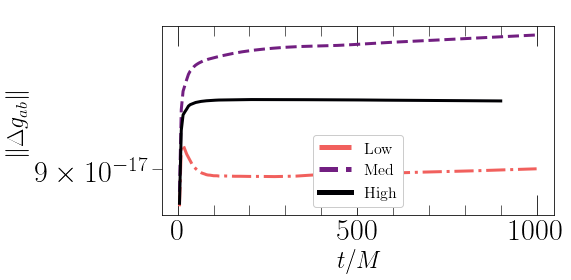

In [48]:
#PlotVariables('TransformedMultipoleEvolutionTrans', ['0','1','2'], ['Low', 'Med','High'], 'MultipolarVars.pdf')
PlotVariables('dCSEvolutionDiabolicalSupport', ['0','1','2'], ['Low', 'Med','High'], 'DiabolicalVars.pdf')
#PlotVariables('dCSEvolutionLong/Spin0.1', ['0','1','2'], ['Low','Med','High'], 'Spin0p1EvVars.pdf')
#PlotVariables('dCSEvolutionLong/HiResIDSpin0.1', ['0','1','2'], ['Low','Med','High'], 'Test.pdf')
#PlotVariables('dCSEvolutionLong/Spin0.6', ['0','1','2'], ['Low', 'Med','High'], 'Spin0p6EvVars.pdf')
#PlotVariables('dCSEvolutionLong/Spin0.9', ['0','1','2'], ['Low', 'Med','High'], 'Spin0p9EvVars.pdf')


In [25]:
## Plot time derivatives with resolution

def PlotManyVariablesRes(pp, chi, figname):
    
    Levs = ['0','1','2']
    Labels = ['Low','High']
    def GetFilename(p, lev):
        return p + '/JoinedLev' + lev + '/Vars.dat'
    
    fig, ax = plt.subplots(1, figsize=(10,8))
    
    cmap = matplotlib.cm.get_cmap('PuBuGn')
    Colors = [cmap(float(i+1)/(len(Levs)+1)) for i in range(len(Levs))]
    #Colors = Colors[::-1]
    Linestyles = ['-', '-', '-']
    
    for lev, lab, c, ls in zip(Levs, Labels, Colors, Linestyles):
        time, psi = np.loadtxt(GetFilename(pp, lev), \
            comments="#",usecols=([0,1]),unpack=True)
        #m = np.where(time % 25.0 == 0)
        #psi = psi[m]
        #time = time[m]
        dpsi = np.gradient(psi)/np.gradient(time) #/psi
        ax.plot(time, np.abs(dpsi), '-', label = lab, c=c,lw=2, ls=ls)
        
    ax.set_ylabel(r'$ \partial_t \|\Delta g_{ab}\|$', fontsize=30)
    ax.set_xlabel('$t/M$', fontsize=30)
    A = ax.get_ylim()[1]
    ax.text(100, 0.1*A, r'$\chi = $ ' + chi, fontsize=30)
        
    #ax.axvline(1.2750000000000000e+03)
    ax.set_yscale('log')
    ax.set_xlim(0,1000)
    leg = ax.legend(fontsize=20,framealpha=1.0, loc='best')
    for legobj in leg.legendHandles:
        legobj.set_linewidth(5.0)
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

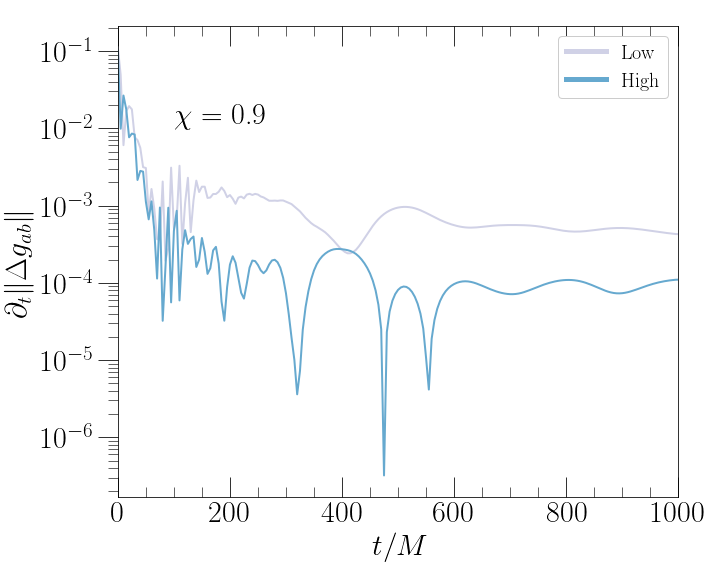

In [26]:
#PlotManyVariablesRes('dCSEvolutionLong/Spin0.1', '0.1', 'SpinVars0p1.pdf')
#PlotManyVariablesRes('dCSEvolutionLong/HiResIDSpin0.1', '0.1', 'SpinVars0p1HiResID.pdf')
#PlotManyVariablesRes('dCSEvolutionLong/Spin0.6', '0.6', 'SpinVars0p6.pdf')
PlotManyVariablesRes('dCSEvolutionLong/Spin0.9', '0.9', 'SpinVars0p9.pdf')